In [2]:
# import required packages
import numpy as np
import numpy.random as nr
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
import sklearn.model_selection as ms
from sklearn import feature_selection as fs
import sklearn.metrics as skln
from sklearn import preprocessing
from sklearn import linear_model
import scipy.stats as ss
#make plots appear inline in the note book
%matplotlib inline


In [3]:
#check for duplicate rows,missing values and find out the imbalance of  dataset
df=pd.read_csv('clean_data_with_Agegroup')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16404 entries, 0 to 16403
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            16404 non-null  int64  
 1   CustomerID            16404 non-null  int64  
 2   FirstName             16404 non-null  object 
 3   LastName              16404 non-null  object 
 4   AddressLine1          16404 non-null  object 
 5   City                  16404 non-null  object 
 6   StateProvinceName     16404 non-null  object 
 7   CountryRegionName     16404 non-null  object 
 8   PostalCode            16404 non-null  object 
 9   PhoneNumber           16404 non-null  object 
 10  BirthDate             16404 non-null  object 
 11  Education             16404 non-null  object 
 12  Occupation            16404 non-null  object 
 13  Gender                16404 non-null  object 
 14  MaritalStatus         16404 non-null  object 
 15  HomeOwnerFlag      

In [4]:
#check the imbalance of the dataset
df['BikeBuyer'].value_counts()

0    10949
1     5455
Name: BikeBuyer, dtype: int64

In [5]:
#specify the categorical columns
categorical_columns = ['Education','Occupation','Gender','MaritalStatus','AgeGroup','HomeOwnerFlag']
for cate in categorical_columns:
    print(df[cate].unique())

['Bachelors ' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
['Professional' 'Management' 'Skilled Manual' 'Clerical' 'Manual']
['M' 'F']
['M' 'S']
['25-45' '0-25' '45-55' '55-120']
[1 0]


In [6]:
numerical_columns=['NumberCarsOwned','NumberChildrenAtHome','TotalChildren','YearlyIncome']

In [7]:
def encode_string(cat_feature):
    #first encode the strings to numeric categories
    enc=preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature=enc.transform(cat_feature)
    
    #now apply one hot encodig
    ohe=preprocessing.OneHotEncoder()
    encoded=ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()

    

In [8]:
#create a list of empty lists to categorical features
alist=[ [] for _ in range(df.shape[0])]
cat_features=np.array(alist)
for col in categorical_columns:
    temp=encode_string(df[col])
    print(col,temp.shape)
    cat_features=np.concatenate([cat_features,temp],axis=1)
    
#used later to ideantify columns to start scalling  
start_num_idx=cat_features.shape[1]
print(start_num_idx)
print(cat_features.shape)
print(cat_features[:0,:])

Education (16404, 5)
Occupation (16404, 5)
Gender (16404, 2)
MaritalStatus (16404, 2)
AgeGroup (16404, 4)
HomeOwnerFlag (16404, 2)
20
(16404, 20)
[]


In [9]:
Num_features=np.array(df[numerical_columns])
print(Num_features.shape)

(16404, 4)


In [10]:
# Join the categorical and numerical together
features=np.concatenate([cat_features,Num_features],axis=1)
np.set_printoptions(suppress=True)#Turn off scientific Display
print(features[:2,:],features.shape)

[[     1.      0.      0.      0.      0.      0.      0.      0.      1.
       0.      0.      1.      1.      0.      0.      1.      0.      0.
       0.      1.      0.      0.      2. 137947.]
 [     1.      0.      0.      0.      0.      0.      0.      0.      1.
       0.      0.      1.      0.      1.      0.      1.      0.      0.
       1.      0.      1.      3.      3. 101141.]] (16404, 24)


In [36]:
nr.seed(77)
labels = np.array(df['BikeBuyer'])
indx = range(features.shape[0])

test_size = int(0.3*features.shape[0])
indx = ms.train_test_split(indx, test_size = test_size)

x_train = features[indx[0],:]
y_train = np.ravel(labels[indx[0]])

x_test = features[indx[1],:]
y_test = np.ravel(labels[indx[1]])


print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(start_num_idx)


(11483, 24) (11483,)
(4921, 24) (4921,)
20


In [37]:
#apply scaling of numerrical columns
scaler=preprocessing.StandardScaler().fit(x_train[:,start_num_idx:])
x_train[:,start_num_idx:]=scaler.transform(x_train[:,start_num_idx:])
x_test[:,start_num_idx:]=scaler.transform(x_test[:,start_num_idx:])
print(x_train.shape)
x_train[:3,:]

(11483, 24)


array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.44013102, -0.65407762,  1.78437659,  0.57012382],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        -1.31534813,  0.00320542, -0.59465408, -1.32860876],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
  

In [38]:
#Build logistic regression model
class_weight={0:0.4,1:0.6}
logistic_mod=linear_model.LogisticRegression(class_weight=class_weight)
logistic_mod=linear_model.LogisticRegression(class_weight='balanced')
logistic_mod.fit(x_train,y_train)


LogisticRegression(class_weight='balanced')

In [39]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-1.04051054]
[[ 0.26075032  0.21235915 -0.21476286  0.01442549 -0.27332396 -0.0587099
  -0.15914905  0.02278114  0.09152652  0.10299943 -0.34346294  0.34291108
  -0.77766907  0.77711721  0.6997026   1.06325246 -0.01202078 -1.75148615
  -0.08723613  0.08668427 -0.02353964  1.14967973 -0.09052696  0.44044058]]


In [41]:
probabilities = logistic_mod.predict_proba(x_test)
print(probabilities[:15,:])

[[0.18032136 0.81967864]
 [0.51967904 0.48032096]
 [0.49018097 0.50981903]
 [0.37455768 0.62544232]
 [0.76380582 0.23619418]
 [0.02405286 0.97594714]
 [0.89517475 0.10482525]
 [0.53799035 0.46200965]
 [0.87000777 0.12999223]
 [0.75937525 0.24062475]
 [0.71714023 0.28285977]
 [0.80414835 0.19585165]
 [0.62260977 0.37739023]
 [0.78156372 0.21843628]
 [0.71862886 0.28137114]]


In [42]:
#score and evalute the model and print the metrics
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])

[1 0 1 1 0 1 0 0 0 0 0 0 0 0 0]
[1 0 1 0 0 1 0 0 0 0 0 0 0 0 1]


In [43]:
def print_metrics(labels, scores):
    metrics = skln.precision_recall_fscore_support(labels, scores)
    conf = skln.confusion_matrix(labels, scores)
    
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[1,1] + '             %5d' % conf[1,0])
    print('Actual negative    %6d' % conf[0,1] + '             %5d' % conf[0,0])
    print('')

    print('Accuracy  %0.2f' % skln.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][1] + '        %6d' % metrics[3][0])
    print('Precision  %6.2f' % metrics[0][1] + '        %6.2f' % metrics[0][0])
    print('Recall     %6.2f' % metrics[1][1] + '        %6.2f' % metrics[1][0])
    print('F1         %6.2f' % metrics[2][1] + '        %6.2f' % metrics[2][0])

print_metrics(y_test, scores) 


                 Confusion matrix
                 Score positive    Score negative
Actual positive      1189               427
Actual negative       710              2595

Accuracy  0.77
 
           Positive      Negative
Num case     1616          3305
Precision    0.63          0.86
Recall       0.74          0.79
F1           0.68          0.82


In [44]:
def plot_auc(labels, probs):
    
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC

    # labels are actual, probs (use col 1) for bad credit
    fpr, tpr, threshold = skln.roc_curve(labels, probs[:,1]) 
    auc = skln.auc(fpr, tpr)

    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
#plot_auc(y_test, probabilities) 

In [146]:
# predict based on x_test values
probabilities = logistic_mod.predict_proba(x_test)
print(probabilities[:5,:]) #first 5 values



[[0.18032136 0.81967864]
 [0.51967904 0.48032096]
 [0.49018097 0.50981903]
 [0.37455768 0.62544232]
 [0.76380582 0.23619418]]


threshold value:  0.5
                 Confusion matrix
                 Score positive    Score negative
Actual positive      1189               427
Actual negative       710              2595

Accuracy  0.77
 
           Positive      Negative
Num case     1616          3305
Precision    0.63          0.86
Recall       0.74          0.79
F1           0.68          0.82


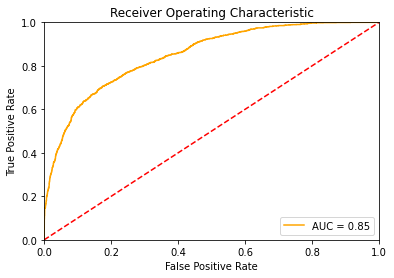

In [45]:
threshold = 0.5
print("threshold value: ", threshold)
scores=score_model(probabilities,threshold)
print_metrics(y_test, scores)  
plot_auc(y_test, probabilities)


In [148]:
thresholdList = np.arange(0,1.1,0.1)
for threshold in thresholdList:
    print("threshold value: ", threshold)
    scores = score_model(probabilities, threshold)
    print_metrics(y_test, scores)  
    #plot_auc(y_test, probabilities)  
    print(80*'-')


threshold value:  0.0
                 Confusion matrix
                 Score positive    Score negative
Actual positive      1616                 0
Actual negative      3305                 0

Accuracy  0.33
 
           Positive      Negative
Num case     1616          3305
Precision    0.33          0.00
Recall       1.00          0.00
F1           0.49          0.00
--------------------------------------------------------------------------------
threshold value:  0.1
                 Confusion matrix
                 Score positive    Score negative
Actual positive      1613                 3
Actual negative      2729               576

Accuracy  0.44
 
           Positive      Negative
Num case     1616          3305
Precision    0.37          0.99
Recall       1.00          0.17
F1           0.54          0.30
--------------------------------------------------------------------------------
threshold value:  0.2
                 Confusion matrix
                 Score positive   

D:\Users\NEW\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\NEW\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 Confusion matrix
                 Score positive    Score negative
Actual positive         0              1616
Actual negative         0              3305

Accuracy  0.67
 
           Positive      Negative
Num case     1616          3305
Precision    0.00          0.67
Recall       0.00          1.00
F1           0.00          0.80
--------------------------------------------------------------------------------


threshold value:  0.64
                 Confusion matrix
                 Score positive    Score negative
Actual positive      1005               611
Actual negative       368              2937

Accuracy  0.80
 
           Positive      Negative
Num case     1616          3305
Precision    0.73          0.83
Recall       0.62          0.89
F1           0.67          0.86


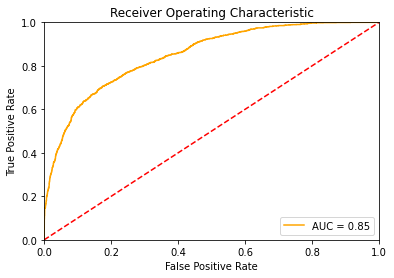

In [46]:
# pick good threshold value
threshold = 0.64
print("threshold value: ", threshold)
scores = score_model(probabilities, threshold)
print_metrics(y_test, scores)  
plot_auc(y_test, probabilities)  



In [47]:
#Task4
#split the dataset with 70:30 based Bike buyer and create some random sample if needed
nr.seed(777)
labels=np.array(np.log(df['AveMonthSpend']))
print(labels)
indx=range(features.shape[0])

test_size=int(0.3*features.shape[0])
indx=ms.train_test_split(indx,test_size=test_size)

x_train=features[indx[0],:]
y_train=np.ravel(labels[indx[0]])

x_test=features[indx[1],:]
y_test=np.ravel(labels[indx[1]])

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(start_num_idx)
    

[4.48863637 4.76217393 4.81218436 ... 4.36944785 4.17438727 4.21950771]
(11483, 24) (11483,)
(4921, 24) (4921,)
20


In [48]:
#apply scaling of numerrical columns
scaler=preprocessing.StandardScaler().fit(x_train[:,start_num_idx:])
x_train[:,start_num_idx:]=scaler.transform(x_train[:,start_num_idx:])
x_test[:,start_num_idx:]=scaler.transform(x_test[:,start_num_idx:])
print(x_train.shape)
x_train[:3,:]

(11483, 24)


array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -1.31840874, -0.65695697, -0.60426553, -0.51972654],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -1.31840874, -0.65695697, -0.60426553, -1.34519292],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
  

In [49]:
#Task5 Build the linear Regression model
lin_mod=linear_model.LinearRegression(fit_intercept=False)
lin_mod.fit(x_train,y_train)

LinearRegression(fit_intercept=False)

In [50]:
#Task6 Score Evalute the model and print the metrics
print(lin_mod.intercept_)
print(lin_mod.coef_,lin_mod.coef_.shape[0])

0.0
[ 3.25115031e+10  3.25115031e+10  3.25115031e+10  3.25115031e+10
  3.25115031e+10 -7.12609108e+10 -7.12609108e+10 -7.12609108e+10
 -7.12609108e+10 -7.12609108e+10 -2.46562441e+11 -2.46562441e+11
 -1.43305301e+11 -1.43305301e+11 -1.15946763e+09 -1.15946763e+09
 -1.15946763e+09 -1.15946763e+09  4.29776617e+11  4.29776617e+11
 -6.36863708e-03  1.96127892e-01 -1.71852112e-03  8.72173309e-02] 24


In [51]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = skln.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ##Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(skln.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(skln.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(skln.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(skln.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   

In [55]:
y_score = lin_mod.predict(x_test) 


y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test)
print(y_score_untransform)
print(y_test_untransform)
print_metrics(y_test_untransform, y_score_untransform, lin_mod.coef_.shape[0]+1)    # coef + 1 intercept 






[104.60030677  76.88185535  62.72329503 ...  47.91728611 112.413409
  43.21772061]
[ 94.  73.  66. ...  47. 119.  45.]
Mean Square Error      = 13.883415861221964
Root Mean Square Error = 3.726045606433443
Mean Absolute Error    = 2.9059310531239255
Median Absolute Error  = 2.370424298328828
R^2                    = 0.9812186465370184
Adjusted R^2           = 0.9811265810788665


D:\Users\NEW\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


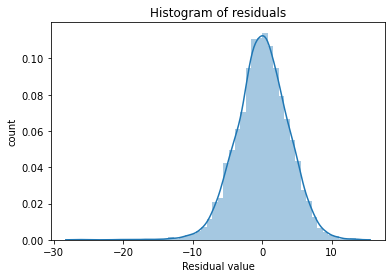

In [56]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
#hist_resids(y_test, y_score)   
hist_resids(y_test_untransform, y_score_untransform)   


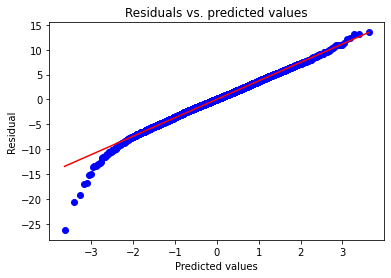

In [57]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test_untransform, y_score_untransform)   
#resid_qq(y_test, y_score)   

D:\Users\NEW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


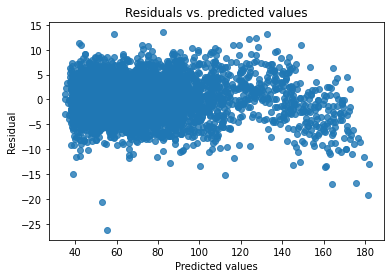

In [158]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

#resid_plot(y_test, y_score) 
resid_plot(y_test_untransform, y_score_untransform) 

In [58]:
# this portion to read AW_test.csv, clean and test
missing_value_formats=['n.a.','?','NA','n/a','na','--', 'null']
#df.to_csv('AW_test')
aw_test = pd.read_csv('AW_test.csv', na_values=missing_value_formats)
aw_test.drop_duplicates(subset='CustomerID', keep='last', inplace=True)
print(aw_test.shape, aw_test.columns)



(500, 23) Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome'],
      dtype='object')


In [59]:
aw_test.isnull().sum()

CustomerID                0
Title                   496
FirstName                 0
MiddleName              216
LastName                  0
Suffix                  499
AddressLine1              0
AddressLine2            487
City                      0
StateProvinceName         0
CountryRegionName         0
PostalCode                0
PhoneNumber               0
BirthDate                 0
Education                 0
Occupation                0
Gender                    0
MaritalStatus             0
HomeOwnerFlag             0
NumberCarsOwned           0
NumberChildrenAtHome      0
TotalChildren             0
YearlyIncome              0
dtype: int64

In [60]:
aw_test.drop(columns=['Title','MiddleName','Suffix','AddressLine2'], inplace=True)


In [61]:
aw_test.isnull().sum()

CustomerID              0
FirstName               0
LastName                0
AddressLine1            0
City                    0
StateProvinceName       0
CountryRegionName       0
PostalCode              0
PhoneNumber             0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
dtype: int64

In [62]:
def convert_bdate_age(birthDate, collectionDate):
    
    diff = collectionDate - birthDate
    age = diff.dt.days.div(365).astype(int)
    return age
    
aw_cDate = pd.to_datetime('1998-01-01')
aw_test['BirthDate'] = pd.to_datetime(df['BirthDate'])    
aw_bDate = aw_test['BirthDate']
aw_age = convert_bdate_age(aw_bDate, aw_cDate)
aw_test['Age'] = aw_age
print(aw_test['Age'])


0      31
1      32
2      32
3      29
4      29
       ..
495    30
496    30
497    31
498    31
499    31
Name: Age, Length: 500, dtype: int32


In [63]:
numGroups = 10
bins = [0,25,45,55,120]
aw_ageCats = pd.cut(aw_test['Age'], bins=bins, labels=['0-25','25-45','45-55','55-120'])
aw_test['AgeGroup'] = aw_ageCats


In [64]:
aw_test.to_csv('clean_aw_test.csv')


In [65]:
aw_test = pd.read_csv('clean_aw_test.csv')
aw_test.columns  #there are NO BikeBuyer and AveMonthSpend


Index(['Unnamed: 0', 'CustomerID', 'FirstName', 'LastName', 'AddressLine1',
       'City', 'StateProvinceName', 'CountryRegionName', 'PostalCode',
       'PhoneNumber', 'BirthDate', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'Age',
       'AgeGroup'],
      dtype='object')

In [66]:
# create a list of empty lists to store features
aw_alist = [ [] for _ in range(aw_test.shape[0]) ]
aw_features = np.array(aw_alist)
for col in categorical_columns:
    temp=encode_string(aw_test[col])
    print(col,temp.shape)
    aw_features=np.concatenate([aw_features,temp],axis=1)
aw_start_num_idx=aw_features.shape[1]
print(aw_features.shape)
print(aw_features[:2,:])

Education (500, 5)
Occupation (500, 5)
Gender (500, 2)
MaritalStatus (500, 2)
AgeGroup (500, 4)
HomeOwnerFlag (500, 2)
(500, 20)
[[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.]]


In [67]:
aw_features=np.concatenate([aw_features,np.array(aw_test[numerical_columns])],axis=1)
aw_features[:2,:]
aw_features.shape

(500, 24)

In [68]:
#Apply scalings of numerical columns
aw_scaler=preprocessing.StandardScaler().fit(aw_features[:,aw_start_num_idx:])
aw_features[:,aw_start_num_idx:]=aw_scaler.transform(aw_features[:,aw_start_num_idx:])
print(aw_features.shape)
aw_features[:3,:]

(500, 24)


array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.35928859, -0.72107754,  1.6591036 ,  0.12653132],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.35928859,  0.53297036,  1.06909521,  0.45161083],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
  

In [69]:
#get the predicted values and store then in to csv files
aw_probabilities=logistic_mod.predict_proba(aw_features)
aw_scores=score_model(aw_probabilities,threshold)
pd_scores=pd.Series(aw_scores)
pd_id=aw_test['CustomerID']
newdf=pd.concat([pd_id,pd_scores],axis=1)
newdf.reset_index()
np.savetxt('ClassificationResults_anitha.csv',newdf,delimiter=',',fmt='%d')



In [72]:
aw_scores = lin_mod.predict(aw_features) 
aw_scores_untransform = np.exp(aw_scores) #get back due to initial log

pd_scores = pd.Series(aw_scores_untransform)
pd_id = aw_test['CustomerID']
newdf = pd.concat([pd_id, pd_scores], axis=1)
newdf.reset_index()
np.savetxt('RegressionResults.csv', newdf, delimiter=',', fmt='%d %f')